In [5]:
import numpy as np
import torch as th

In [24]:
inputs = th.Tensor([[1,0,0],[0,1,0],[0,0,1]])
messages = th.Tensor([[0,0],[1,1],[2,2]])

batch_size = messages.size(0)

id_sampled_messages = np.arange(batch_size)
sampled_messages = messages[id_sampled_messages]
sampled_messages = sampled_messages.unsqueeze(0)
sampled_messages = sampled_messages.repeat(batch_size, 1, 1)
sampled_messages = sampled_messages.permute(1, 0, 2)
sampled_messages = sampled_messages.reshape([batch_size * batch_size, sampled_messages.size(-1)])
sampled_x = inputs.repeat(batch_size, 1, 1, 1)
sampled_x = sampled_x.reshape([batch_size * batch_size, *inputs.size()[1:]])

print(sampled_x)
print(sampled_messages)

eps=-10**10
log_probs = th.Tensor([0,0,eps,eps,0,eps,eps,eps,0])
#m1|x1, m2|x2, m3|x3, m2|x1, m2|x2, m2|x3, m3|x1, m3|x2, m3|x3

log_pi_m_x = log_probs.reshape([batch_size, batch_size]).T
pi_m_x = th.exp(log_pi_m_x)
p_x = th.ones(batch_size) / batch_size  # Here we set p(x)=1/batch_size
p_x = p_x.to(pi_m_x.device)  # Fix device issue

print(log_pi_m_x)
print("cc")
print(pi_m_x.sum(1))

log_p_x = th.log(p_x)
log_pi_m = th.log((pi_m_x * p_x).sum(1))
log_pi_m_x = th.log(pi_m_x.diagonal(0))

mutual_information = log_pi_m_x + log_p_x - log_pi_m

loss_mi = -1*log_pi_m_x*mutual_information.detach()

tensor([[1., 0., 0.],
        [0., 1., 0.],
        [0., 0., 1.],
        [1., 0., 0.],
        [0., 1., 0.],
        [0., 0., 1.],
        [1., 0., 0.],
        [0., 1., 0.],
        [0., 0., 1.]])
tensor([[0., 0.],
        [0., 0.],
        [0., 0.],
        [1., 1.],
        [1., 1.],
        [1., 1.],
        [2., 2.],
        [2., 2.],
        [2., 2.]])
tensor([[ 0.0000e+00, -1.0000e+10, -1.0000e+10],
        [ 0.0000e+00,  0.0000e+00, -1.0000e+10],
        [-1.0000e+10, -1.0000e+10,  0.0000e+00]])
cc
tensor([1., 2., 1.])


In [34]:
target_messages=[]

for sender_id in ["_","_"]:
    for _ in range(10):
        messages = th.Tensor([[2,2],[1,1]])
        target_messages.append(messages)

target_messages=th.stack(target_messages)

print(target_messages.size())

torch.Size([20, 2, 2])


In [52]:
import collections

C = collections.namedtuple("Batch",["data","sender_id","receiver_id","imitator_id"])

a=C(sender_id=2,receiver_id=3,imitator_id=4,data=2)

if getattr(a, "sender_id", False):
    print("coucou")

coucou


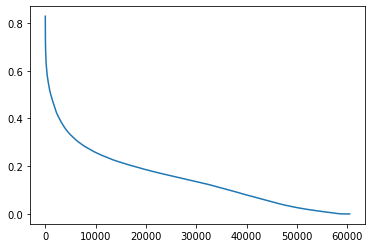

50


In [87]:
import matplotlib.pyplot as plt

mi_values=np.load("/Users/mrita/Desktop/Work/CUP/saved_mi_values.npy")
gene_labels=np.load("/Users/mrita/Desktop/Work/CUP/gene_labels.npy")

ordered_mi_idx = np.argsort(mi_values)[::-1]

plt.plot(mi_values[ordered_mi_idx])
plt.show()

print(np.sum(mi_values>0.7))

In [112]:
voc_size=3

messages=th.Tensor([[2,3,4,5],[2,3,1,5]])
messages = th.cat((messages,th.zeros(messages.size(0),1)),dim=2)
start_token = messages.size(0)*th.
start_token = start_token.unsqueeze(1)
messages = th.cat((start_token,messages),dim=1)

print(messages.size())
print(messages)

IndexError: Dimension out of range (expected to be in range of [-2, 1], but got 2)

In [104]:
th.nn.functional.one_hot(th.Tensor([3,2]).to(int),num_classes=4)

tensor([3., 2.])


tensor([[0, 0, 0, 1],
        [0, 0, 1, 0]])